In [1]:
## RNN에 의한 일본경제 평균 주가(종가) 예측
## 과거 30일분의 주가로부터 당일의 주가를 예측
## 과거 300~61일분을 훈련용 데이터
## 과거 60~31일분을 검증용 데이터
## 과거 30~0일분을 테스트용 데이터

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, GRU, Input
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## https://indexes.nikkei.co.jp/nkave/historical/nikkei_stock_average_daily_jp.csv
data_file = 'nikkei_stock_average_daily_jp.csv'

## 당일 주가를 예측하기 위해 필요한 과거 일수
window_size = 30 # window_size, kernel, sequence
epochs = 10

df = pd.read_csv(data_file, index_col=0)
# 종가
closing_price = df[['종가']].values # tolist()

In [2]:
df.describe()

,종가,시가,상한가,하한가
count,809.000000,809.000000,809.000000,809.000000
mean,21378.655624,21381.374883,21478.512583,21268.651162
std,1505.910475,1506.048504,1497.724899,1519.507053
min,16552.830000,16570.570000,17049.030000,16358.190000
25%,20099.810000,20128.180000,20191.420000,20037.400000
50%,21535.250000,21541.180000,21639.120000,21425.790000
75%,22539.120000,22533.970000,22631.320000,22423.400000
max,24270.620000,24376.170000,24448.070000,24217.260000


In [3]:
## 훈련, 검증, 테스트용 데이터 작성
## 과거 30일분의 주가로부터 당일의 주가 계산
def data_split(data, start, end, window_size): # 
    length = abs(start - end)
    
    X = np.zeros((length, window_size)) # 240, 30
    y = np.zeros((length, 1))
    
    for i in range(length):
        j = start - window_size + i
        k = j + window_size
        
        X[i] = data[j:k ,0]
        y[i] = data[k, 0]
    
    return X, y

In [4]:
## 훈련, 검증, 테스트용 데이터
(X_train, y_train) = data_split(closing_price, -300, -60, window_size)
(X_valid, y_valid) = data_split(closing_price, -60, -30, window_size)
(X_test, y_test) = data_split(closing_price, -30, 0, window_size)

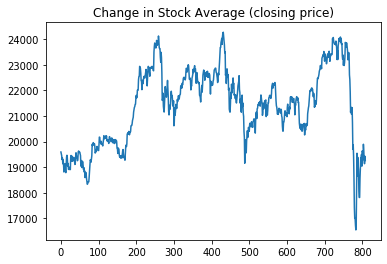

In [5]:
plt.title('Change in Stock Average (closing price)')
plt.plot(range(len(closing_price)), closing_price)
plt.show()

In [6]:
## 표준화
## X만 차원을 변환 (2차원 -> 3차원)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train).reshape(-1, window_size, 1)
X_valid_std = scaler.fit_transform(X_valid).reshape(-1, window_size, 1)
X_test_std = scaler.fit_transform(X_test).reshape(-1, window_size, 1)


In [7]:
# scaler transform 사용
y_train_std = scaler.fit_transform(y_train)
y_valid_std = scaler.fit_transform(y_valid)
y_test_std = scaler.fit_transform(y_test)


In [8]:
## 훈련 RNN (model -> LSTM)
i = Input(shape=(window_size, 1))
x = LSTM(128)(i)
x = Dense(1)(x)
model = Model(i, x)

model.compile(loss='mse', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model 학습  , epochs = 10 (1000)
r = model.fit(X_train_std, y_train_std, epochs=100, 
         batch_size=64, shuffle=True,
         validation_data=(X_valid_std, y_valid_std))

Train on 240 samples, validate on 30 samples
Epoch 1/100
240/240 [==============================] - 2s 7ms/sample - loss: 0.6169 - accuracy: 0.0000e+00 - val_loss: 0.4326 - val_accuracy: 0.0000e+00
Epoch 2/100
240/240 [==============================] - 0s 554us/sample - loss: 0.1832 - accuracy: 0.0000e+00 - val_loss: 0.2246 - val_accuracy: 0.0000e+00
Epoch 3/100
240/240 [==============================] - 0s 554us/sample - loss: 0.1888 - accuracy: 0.0000e+00 - val_loss: 0.2198 - val_accuracy: 0.0000e+00
Epoch 4/100
240/240 [==============================] - 0s 550us/sample - loss: 0.1259 - accuracy: 0.0000e+00 - val_loss: 0.2403 - val_accuracy: 0.0000e+00
Epoch 5/100
240/240 [==============================] - 0s 562us/sample - loss: 0.1375 - accuracy: 0.0000e+00 - val_loss: 0.2280 - val_accuracy: 0.0000e+00
Epoch 6/100
240/240 [==============================] - 0s 546us/sample - loss: 0.1209 - accuracy: 0.0000e+00 - val_loss: 0.2034 - val_accuracy: 0.0000e+00
Epoch 7/100
240/240 [======

240/240 [==============================] - 0s 550us/sample - loss: 0.0398 - accuracy: 0.0000e+00 - val_loss: 0.0773 - val_accuracy: 0.0000e+00
Epoch 54/100
240/240 [==============================] - 0s 554us/sample - loss: 0.0405 - accuracy: 0.0000e+00 - val_loss: 0.0733 - val_accuracy: 0.0000e+00
Epoch 55/100
240/240 [==============================] - 0s 554us/sample - loss: 0.0389 - accuracy: 0.0000e+00 - val_loss: 0.0713 - val_accuracy: 0.0000e+00
Epoch 56/100
240/240 [==============================] - 0s 554us/sample - loss: 0.0381 - accuracy: 0.0000e+00 - val_loss: 0.0734 - val_accuracy: 0.0000e+00
Epoch 57/100
240/240 [==============================] - 0s 533us/sample - loss: 0.0393 - accuracy: 0.0000e+00 - val_loss: 0.0696 - val_accuracy: 0.0000e+00
Epoch 58/100
240/240 [==============================] - 0s 533us/sample - loss: 0.0404 - accuracy: 0.0000e+00 - val_loss: 0.0756 - val_accuracy: 0.0000e+00
Epoch 59/100
240/240 [==============================] - 0s 546us/sample - los

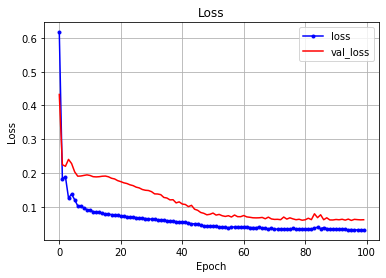

In [10]:
## 훈련의 손실치를 그래프에 표시
# history -> loss
plt.title('Loss')
plt.plot(r.history['loss'], 'b', marker='.', label='loss')
plt.plot(r.history['val_loss'], 'r', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

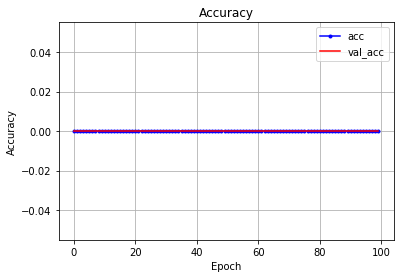

In [11]:
plt.title('Accuracy')
plt.plot(r.history['accuracy'], 'b', marker='.', label='acc')
plt.plot(r.history['val_accuracy'], 'r', label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
## 예측치
p = model.predict(X_test_std)
df_predict_std = pd.DataFrame(p, columns=['예측가격'])


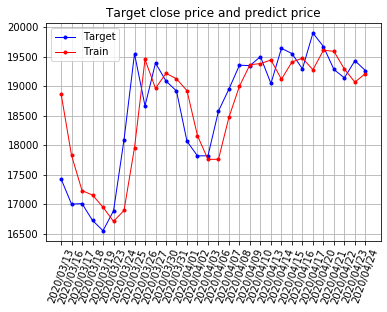

In [13]:
## 예측치 그래프로 표시
predict = scaler.inverse_transform(df_predict_std['예측가격'].values)

pre_date = df.index[-len(y_test):].values
plt.title('Target close price and predict price')
plt.plot(pre_date, y_test, 'b', marker='.', label='Target', linewidth=1)
plt.plot(pre_date, predict, 'r', marker='.', label='Train', linewidth=1)
plt.xticks(rotation=70)
plt.grid(True)
plt.legend()
plt.show()

In [14]:
predict

array([18873.459, 17826.9  , 17231.164, 17155.78 , 16950.254, 16711.137,
       16895.484, 17958.465, 19450.941, 18961.455, 19215.584, 19122.875,
       18921.64 , 18160.605, 17759.182, 17761.664, 18473.004, 18998.496,
       19360.795, 19380.773, 19441.24 , 19115.17 , 19407.36 , 19471.393,
       19276.502, 19605.1  , 19588.17 , 19285.924, 19066.904, 19211.488],
      dtype=float32)